# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


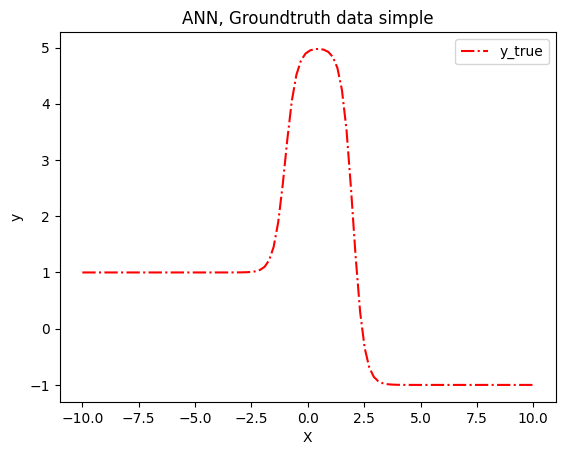

In [159]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [166]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X) 

# Extract weights and biases
weights = mlp.coefs_

biases = mlp.intercepts_
print("weights:")
print(weights)
print("biases:")
print(biases)

print("OK")

weights:
[array([[2.32727034, 0.42967895]]), array([[ 0.52105029,  0.6010525 ],
       [ 2.25761872, -3.25684969]]), array([[-1.30683406,  0.67262061],
       [-1.27845334,  0.59834677]]), array([[ 4.47759302],
       [-2.31819833]])]
biases:
[array([-2.36389186,  0.05409717]), array([0.87246617, 0.0023786 ]), array([0.57979563, 2.63973308]), array([0.26736295])]
OK


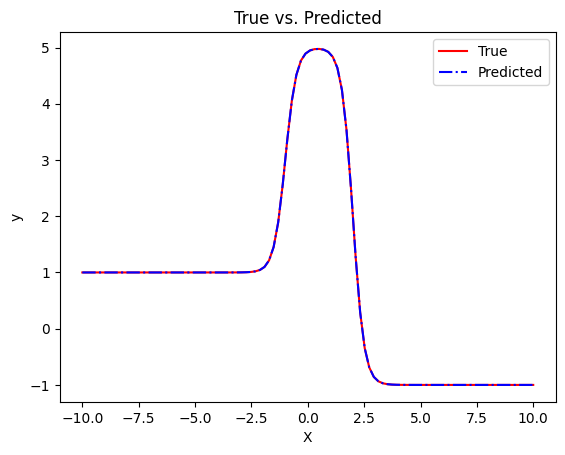

In [161]:
import matplotlib.pyplot as plt

plt.plot(X, y_true, "r", label="True")
plt.plot(X, y_pred, "b-.", label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("True vs. Predicted")
plt.show()


#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.
//DONOME HELP

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

// DONOME HELP<>

weights:
[array([[-2.00059336, -1.99967811]]), array([[-1.99992225],
       [ 2.99987608]])]
biases:
[array([-2.00072962,  3.99932962]), array([-4.98425232e-06])]
w11 = -2.000593362971813
w12 = -1.999678113739106
w21 = [-1.99992225]
w22 = [2.99987608]
b1 = -2.000729624460512
b2 = 3.999329621843825
b3 = -4.98425231884532e-06
For x = 1.5, y_math = [4.28418803]
mlp_sample_prediction:
[4.28418803]


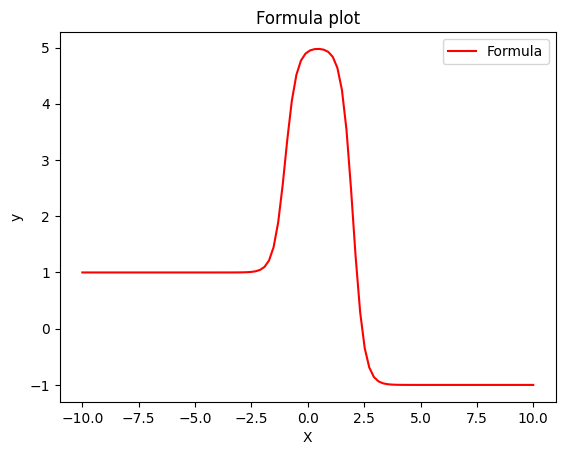

In [162]:
# Extracted weights and biases
import numpy as np
# Extract the weights and biases
w11, w12 = weights[0][0]
w21 = weights[1][0]
w22 = weights[1][1]

b1, b2 = biases[0]
b3 = biases[1][0]

print("weights:")
print(weights)
print("biases:")
print(biases)
# Print the extracted parameters
print("w11 =", w11)
print("w12 =", w12)
print("w21 =", w21)
print("w22 =", w22)
print("b1 =", b1)
print("b2 =", b2)
print("b3 =", b3)

# Define the mathematical formula
def network_formula(x):
    return (w21*np.tanh(w11*x+b1) + w22*np.tanh(w12*x+b2))+b3

# Test the formula with a sample input
x_sample = 1.5
y_sample = network_formula(x_sample)

print(f"For x = {x_sample}, y_math = {y_sample}")

mlp_sample_prediction= mlp.predict([[x_sample]])

print("mlp_sample_prediction:")
print(mlp_sample_prediction)


plt.plot(X, network_formula(X), "r", label="Formula")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula plot")
plt.show()


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

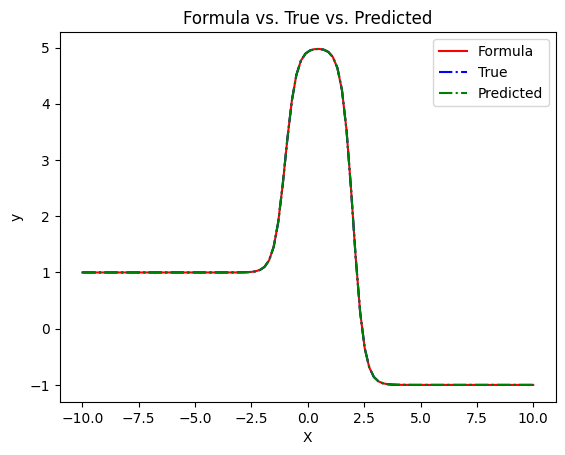

In [163]:

plt.plot(X, network_formula(X), "r", label="Formula")
plt.plot(X, y_true, "b-.", label="True")
plt.plot(X, y_pred, "g-.", label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula vs. True vs. Predicted")
plt.show()


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

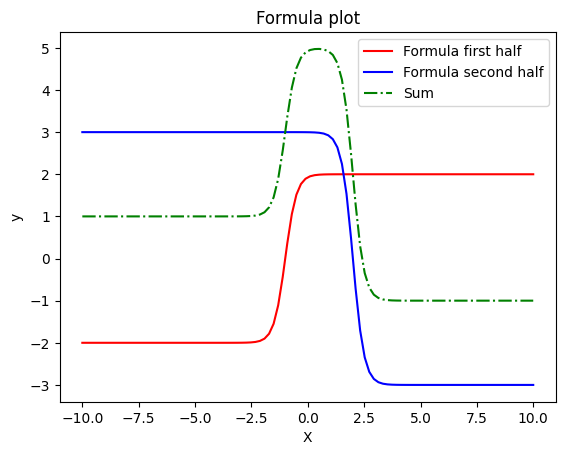

In [164]:
def network_formula_first_half(x):
    return (w21*np.tanh(w11*x+b1))

def network_formula_second_half(x):
    return (w22*np.tanh(w12*x+b2))

sum = network_formula_first_half(X) + network_formula_second_half(X) +b3
plt.plot(X, network_formula_first_half(X), "r", label="Formula first half")
plt.plot(X, network_formula_second_half(X), "b", label="Formula second half")
plt.plot(X, sum, "g-.", label="Sum")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula plot")
plt.show()




#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

Text(0.5, 1.0, 'ANN, Groundtruth data for Sinc')

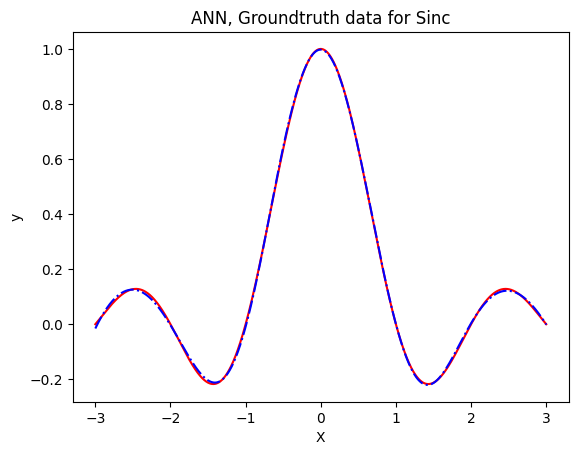

In [169]:


def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()


mlp2 = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [5,5,5,5,5], # layes and neurons in layers: 5 hidden layers with 5 neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)
mlp2.fit(X, y_true)
y_pred_sinc = mlp2.predict(X)

plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_sinc, "b-.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")
